In [1]:
!pip install numpy
!pip install sklearn
!pip install sklearn.inspection

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement sklearn.inspection (from versions: none)
ERROR: No matching distribution found for sklearn.inspection


In [2]:
!pip install -U scikit-learn --user

Use this sigmoid function: 

In [3]:
# Where x is [1 x1 x2 ...xd].T
# Where W is [W0 W1 W2 ... Wd].T

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import inspection
import sklearn.inspection
import matplotlib.pyplot as plt
import math

In [4]:
# BEGIN VAR 1

# Load Dataset
filename = "C:/Users/Sohel/Dropbox/Study Stuff/CSE421- Machine Learning/assign5 (due dec5)/notebook/seeds_dataset.txt"
with open(filename) as f:
    lines = f.readlines()

# Format dataset into a n x d vector

# data=[]
# for i, line in enumerate(lines):
#   thisline = []
#   # print('reading line number', i )
  
#   for j,value in enumerate(line.split('\t')):
#     # print(value)
#     if (len(value)==0):
#       # missing data. Time for a filler(will be replaced later by mean of that attribute)
#       thisline.append(float('1.0'))
#     else:
#       thisline.append(float(value))
  
#   thisline= np.array (thisline)
#   data.append(thisline)

# data = np.array(data)

In [5]:
# read var2

arr = np.zeros((210,8))
for i, line in enumerate(lines):
  # print('reading line number', i )
  thisline = line.split('\t')
  print('this line has', len(thisline) , 'values')
  for j in range(8):
    thisvalue = thisline[j]
    print(thisvalue)
    if (len(thisvalue)==0):
      # missing data. Time for a filler(will be replaced later by mean of that attribute)
      arr[i][j] = float('0.0')
    else:
      arr[i][j] = float(thisvalue)

print (arr[:,7])
np.shape(arr)

# Input and output vectors

X = arr[:,:7]
Y = arr[:,7:]

this line has 8 values
15.26
14.84
0.871
5.763
3.312
2.221
5.22
1

this line has 8 values
14.88
14.57
0.8811
5.554
3.333
1.018
4.956
1

this line has 8 values
14.29
14.09
0.905
5.291
3.337
2.699
4.825
1

this line has 8 values
13.84
13.94
0.8955
5.324
3.379
2.259
4.805
1

this line has 8 values
16.14
14.99
0.9034
5.658
3.562
1.355
5.175
1

this line has 8 values
14.38
14.21
0.8951
5.386
3.312
2.462
4.956
1

this line has 8 values
14.69
14.49
0.8799
5.563
3.259
3.586
5.219
1

this line has 10 values
14.11
14.1
0.8911
5.42
3.302
2.7

5
this line has 8 values
16.63
15.46
0.8747
6.053
3.465
2.04
5.877
1

this line has 8 values
16.44
15.25
0.888
5.884
3.505
1.969
5.533
1

this line has 8 values
15.26
14.85
0.8696
5.714
3.242
4.543
5.314
1

this line has 8 values
14.03
14.16
0.8796
5.438
3.201
1.717
5.001
1

this line has 8 values
13.89
14.02
0.888
5.439
3.199
3.986
4.738
1

this line has 8 values
13.78
14.06
0.8759
5.479
3.156
3.136
4.872
1

this line has 8 values
13.74
14.05
0.8744
5.482
3

In [6]:
# mean vector
meanvector = [0,0,0,0,0,0,0]
for i in range(7):
  meanvector[i] = np.mean(X[:,i])
print(meanvector)

[14.84752380952381, 14.559285714285714, 0.8588328571428571, 5.563918095238094, 3.265814285714286, 3.693529523809524, 5.3045285714285715]


In [7]:
# how many members in each training class?

def count_classes( inlabels ):
  classcounts = [0,0,0]

  for i in range(210):
    if (inlabels[i]==1.0):
      classcounts[0]+=1

    if (inlabels[i]==2.0):
      classcounts[1]+=1

    if (inlabels[i]==3.0):
      classcounts[2]+=1
  
  return classcounts

classcounts = count_classes (Y)
print(classcounts)

[66, 68, 65]


In [8]:
n = 210
d = 7

# for each of the input attribute columns,
for i in range(d):
  # make sure the entire column contains no zero-values.
  for j in range(n):
    if (X[j][i] == 0):
      X[j][i] = meanvector[i]
      print('anomalous input detected! replaced with mean')

expected_labels = [1.0, 2.0, 3.0]
# for each of the input attribute columns,
for i in range(n):
  # make sure there is no value other than 1,...,K. If found, replace by the most frequent class' label.
  if (Y[i] not in expected_labels):
    print('anomalous label detected! replacing with expected label')
    if (i<classcounts[0]):
      Y[i] = expected_labels[0]
    if (i>classcounts[1]):
      Y[i] = expected_labels[1]
    if (i>(classcounts[0]+classcounts[1])):
      Y[i] = expected_labels[2]

#update classcount after correction
classcount = count_classes(Y)

anomalous input detected! replaced with mean
anomalous input detected! replaced with mean
anomalous input detected! replaced with mean
anomalous input detected! replaced with mean
anomalous input detected! replaced with mean
anomalous input detected! replaced with mean
anomalous input detected! replaced with mean
anomalous input detected! replaced with mean
anomalous label detected! replacing with expected label
anomalous label detected! replacing with expected label
anomalous label detected! replacing with expected label
anomalous label detected! replacing with expected label
anomalous label detected! replacing with expected label
anomalous label detected! replacing with expected label
anomalous label detected! replacing with expected label
anomalous label detected! replacing with expected label
anomalous label detected! replacing with expected label
anomalous label detected! replacing with expected label
anomalous label detected! replacing with expected label


In [9]:
# Q(a): Data is clean. Time to split it. (Can use library function)

# Split into training and testing sets of known size
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=42)
N_train = np.shape(X_train)[0]
N_test = np.shape(X_test)[0]

# use min-max normalization on the data
def minmaxnorm( indata ):
  for j in range(np.shape(indata)[1]):
    
    colmin = np.min(indata[0:,j])
    colmax = np.max(indata[0:,j])
  
    for i in range(np.shape(indata)[0]):
      indata[i][j] = (indata[i][j]-colmin) / (colmax-colmin)
  return indata
X_train = minmaxnorm(X_train)

In [10]:
#check: Are all the trainset values within the range of 0 and 1?
print(np.shape(X_train))
for j in range (d):
  print('Range of attribute number' ,j, ':', np.min(X_train[0:,j]), np.max(X_train[0:,j]))

(140, 7)
Range of attribute number 0 : 0.0 1.0
Range of attribute number 1 : 0.0 1.0
Range of attribute number 2 : 0.0 1.0
Range of attribute number 3 : 0.0 1.0
Range of attribute number 4 : 0.0 1.0
Range of attribute number 5 : 0.0 1.0
Range of attribute number 6 : 0.0 1.0


In [11]:
#Q(b): Use sklearn's logistic regression model and run it in “one vs rest” mode. 
clf = LogisticRegression(random_state=0, solver='saga',multi_class='ovr').fit(X_train, Y_train)
clf.predict_proba(X_test[:2, :])

C:\Users\Sohel\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[3.06833676e-12, 1.00000000e+00, 7.90812674e-33],
       [1.20905711e-15, 1.00000000e+00, 2.12744122e-26]])

In [12]:
# Running Prediction on test dataset
Y_pred_test = clf.predict(X_test[:, :])
print(Y_pred_test)

# Running Prediction on training dataset
Y_pred_train = clf.predict(X_train[:, :])
print(Y_pred_train)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[1. 1. 2. 2. 3. 2. 2. 3. 2. 1. 3. 2. 1. 1. 3. 3. 2. 1. 2. 1. 2. 2. 2. 2.
 3. 2. 2. 1. 1. 2. 2. 1. 1. 3. 3. 1. 1. 3. 1. 3. 1. 3. 2. 3. 2. 3. 2. 2.
 1. 3. 3. 3. 1. 3. 3. 2. 3. 1. 1. 2. 1. 2. 1. 3. 3. 2. 3. 3. 1. 2. 3. 2.
 3. 1. 2. 1. 2. 3. 3. 3. 1. 2. 1. 1. 2. 2. 2. 3. 3. 2. 2. 1. 1. 3. 2. 1.
 3. 2. 3. 2. 3. 3. 3. 1. 2. 1. 3. 3. 3. 1. 1. 2. 1. 1. 3. 3. 2. 2. 3. 3.
 1. 3. 3. 2. 3. 2. 2. 2. 2. 2. 2. 3. 1. 3. 2. 2. 1. 2. 3. 2.]


# Confusion Matrix 

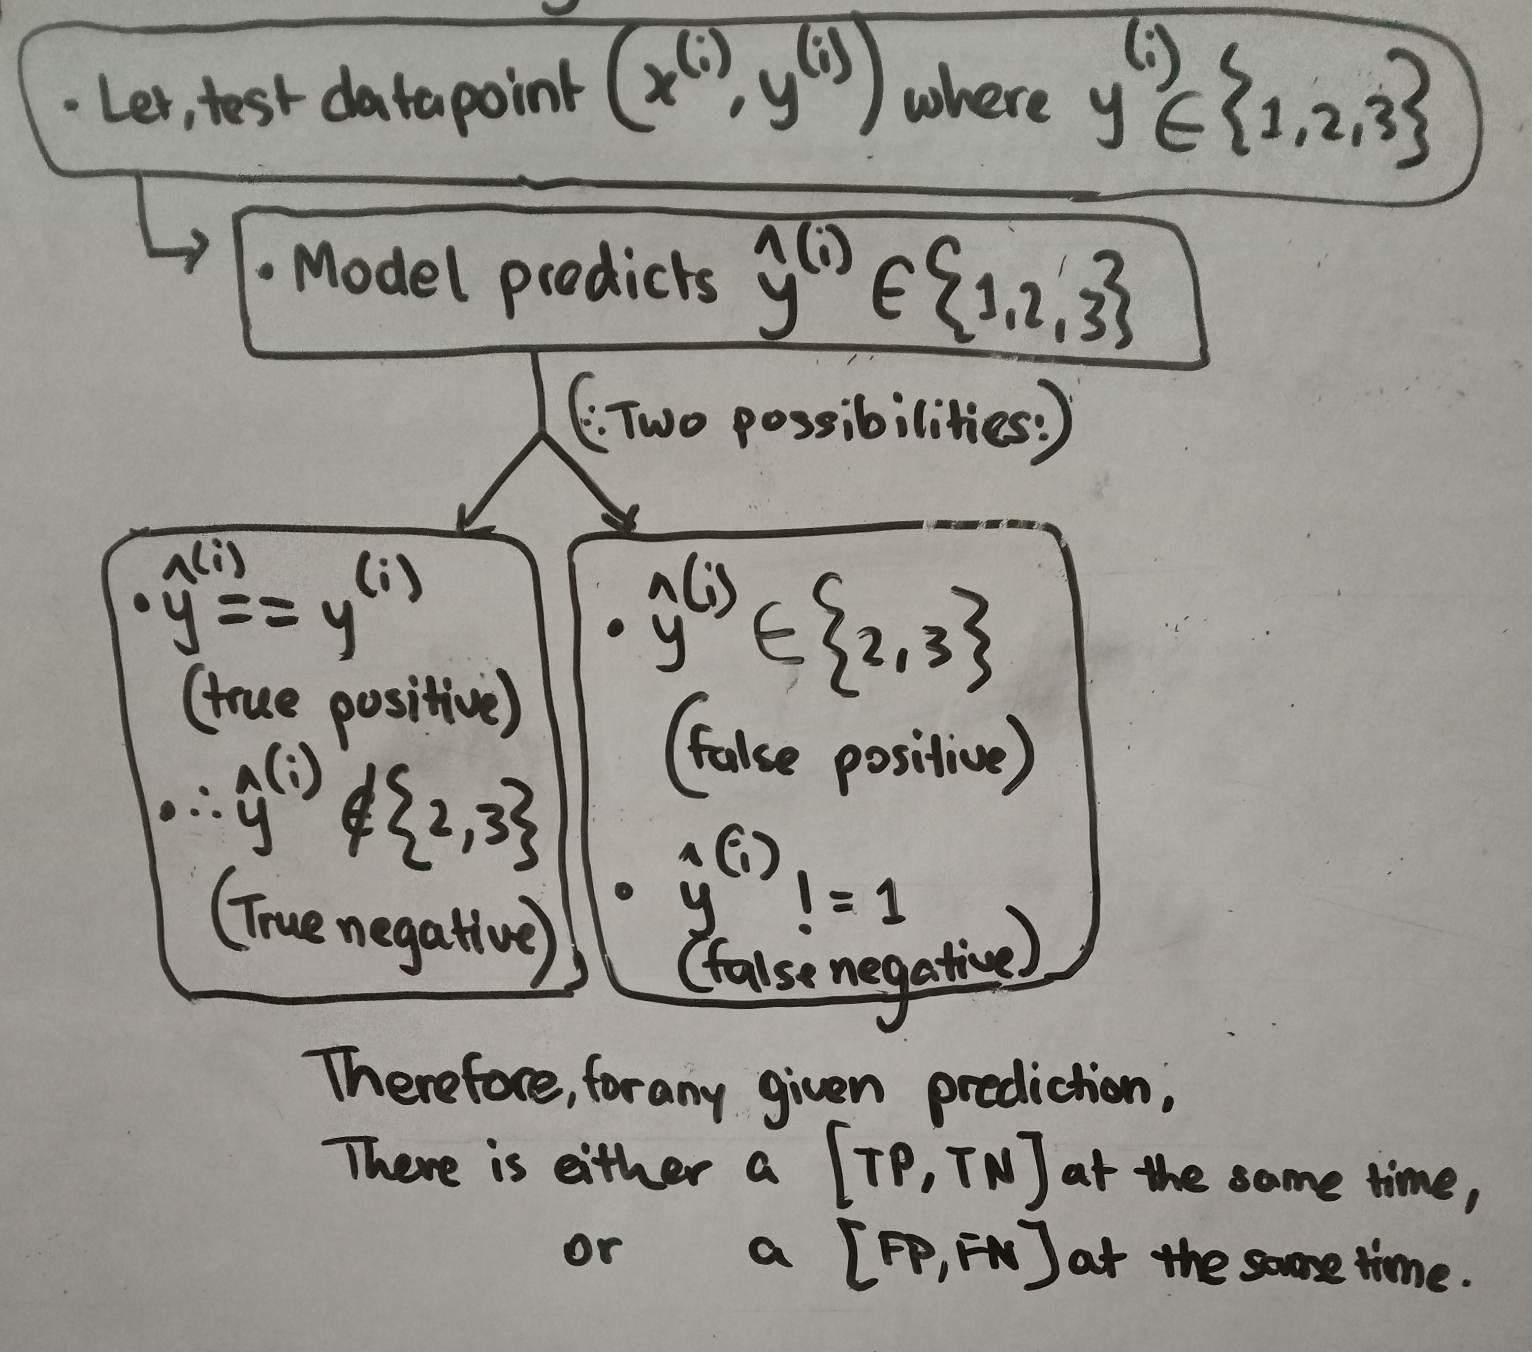

In [13]:
# Computing Confusion Matrix for training dataset

# designing confusion matrix

def get_conftmat( indata,preddata ):
  _T = 0
  _P = 0
  _F = 1
  _N = 1
  confmat = np.zeros ( (2,2) )
  print(np.shape(indata))

  # populating confusion matrix
  for i in range(70):
    if (indata[i]==preddata[i]).any():
      #case1: TP AND TN
      confmat[_T][_P]+=1
      confmat[_T][_N]+=1
    else:
      #case2: FP AND FN
      confmat[_F][_P]+=1
      confmat[_F][_N]+=1

  # show confmat

  print('TP FP:', confmat[_T][_P], confmat[_F][_P])
  print('FN TN:', confmat[_F][_N], confmat[_T][_N])

  return confmat

print('confusion matrix for running the model on the training dataset:')
conftmat_train = get_conftmat(Y_train,Y_pred_train)

print('confusion matrix for running the model on the testing dataset:')
conftmat_test = get_conftmat(Y_test,Y_pred_test)

confusion matrix for running the model on the training dataset:
(140, 1)
TP FP: 63.0 7.0
FN TN: 7.0 63.0
confusion matrix for running the model on the testing dataset:
(70, 1)
TP FP: 22.0 48.0
FN TN: 48.0 22.0


In [14]:
clf.coef_

array([[-0.58293243, -0.58124773,  2.10391816,  0.33753708, -0.50137324,
        -2.7480854 , -2.23449721],
       [ 2.89910138,  2.95804385,  0.34065519,  0.8409699 ,  1.13530167,
         0.65751064,  2.09968663],
       [-2.56264229, -2.45879983, -2.34135291, -1.07391327, -0.84654102,
         2.09637226, -0.02994477]])

In [15]:
clf.predict(X_test[:, :])

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2.])

In [16]:
clf.score(X_train, Y_train)

0.9142857142857143

In [17]:
clf.score(X_test, Y_test)

0.3142857142857143

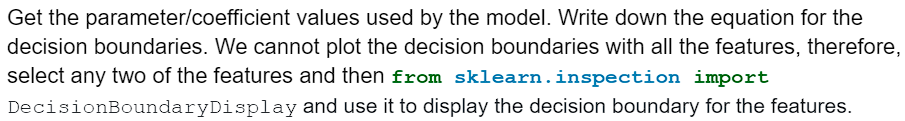

In [18]:
# Get parameters

# Need to redo as Bivariate Logistic Regression [:2] to select only the first two attributes

classifier = LogisticRegression().fit(X_train[:,:2], Y_train)
# disp = sklearn.inspection.DecisionBoundaryDisplay.from_estimator(
# classifier, X, response_method="predict",
# xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
# alpha=0.5,
# )


C:\Users\Sohel\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


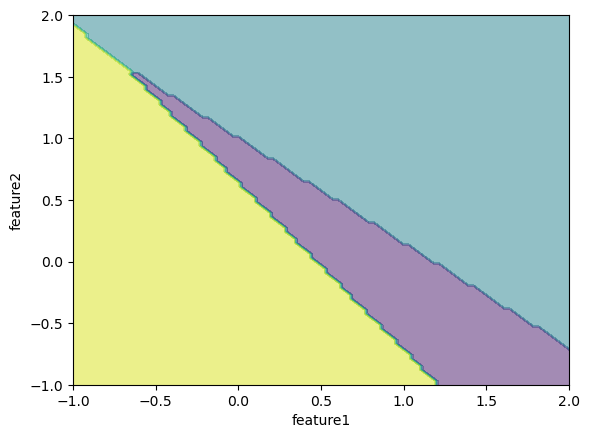

In [19]:
disp = sklearn.inspection.DecisionBoundaryDisplay.from_estimator(classifier, X_train[:,:2], response_method="predict",
xlabel='feature1', ylabel='feature2',
alpha=0.5,
)

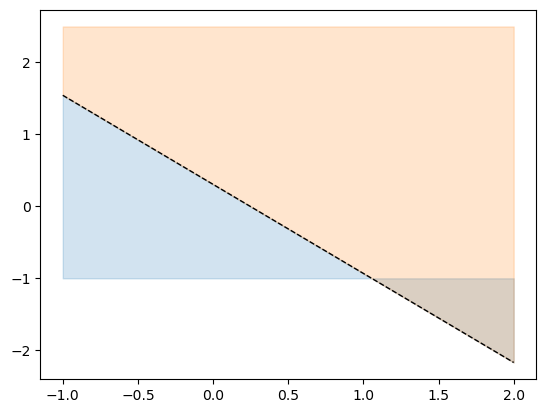

In [20]:
# Visualizing decision boundary based on two attributes

# Retrieve the model parameters.
b = classifier.intercept_[0]
w1, w2, = classifier.coef_[:2].T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

#Plot
xmin, xmax = -1, 2
ymin, ymax = -1, 2.5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

In [21]:
print(classifier.coef_)
print(classifier.intercept_)

[[ 0.06817345 -0.38035519]
 [ 2.99976697  3.06733066]
 [-3.06794042 -2.68697547]]
[ 0.65534148 -2.7964886   2.14114712]


In [124]:
# Step1: Define Theta and X_i. Check dimensions before proceeding.
W = np.ones((d+1,1))
print(np.shape(W))


print(np.shape(X_train))

# Step 1b: 
# To make X_datapoint mulitpliable with a (8,1) vector, we must stack an entire row of ones to X_train.
# Lets call this new dataset as X_train_stacked.
ones_train = np.ones((N_train,1))
X_train_stacked = np.hstack((X_train, ones_train))
print(np.shape(X_train_stacked))

(8, 1)
(140, 7)
(140, 8)


In [127]:
# do the same for the test dataset

print(np.shape(X_test))

ones_test = np.ones((N_test,1))
print(np.shape(ones))

X_test_stacked = np.hstack((X_test, ones_test))
print(np.shape(X_test_stacked))

(70, 7)
(140, 1)
(70, 8)


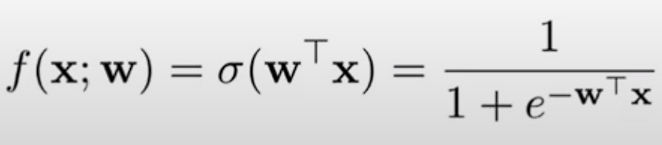

In [108]:
# Step2: Define h(x) in terms of (theta,X) using a sigmoid function

def h_x ( inw, inx ):
    # z = theta transpose x
    z = np.matmul(inw.T,inx)   
    return 1/(1+ (math.exp(-z)) )

# test h_x on one datapoint


this_datapoint = np.reshape(X_train_stacked[0,:], (d+1,1))
print(np.shape(this_datapoint))
print(h_x(W, this_datapoint))

(8, 1)
0.9848599641663264


In [81]:
# Remember: We will be using THREE classifiers. Therefore,

# Step3: For training each classifier, we re-label Y_train to use an accordingly binarized set of labels.
# (For example, classifer#1 will have all labels set to either 1.0 or 0.0, #2 will have all set to either 2.0 or 0.0, and so on)

Y_train_1 = np.zeros((N_train, 1))
for i,label in enumerate(Y_train):
    if (label==1.0):
        Y_train_1[i] = 1.0
    else:
        Y_train_1[i] = 0.0  
        
Y_train_2 = np.zeros((N_train, 1))
for i,label in enumerate(Y_train):
    if (label==1.0):
        Y_train_2[i] = 2.0
    else:
        Y_train_2[i] = 0.0  
        
Y_train_3 = np.zeros((N_train, 1))
for i,label in enumerate(Y_train):
    if (label==1.0):
        Y_train_3[i] = 3.0
    else:
        Y_train_3[i] = 0.0  

In [89]:
# check shape compatibility before proceeding

print(np.shape(Y_train_1))
print(np.shape(X_train[0,:]))

(140, 1)
(7,)


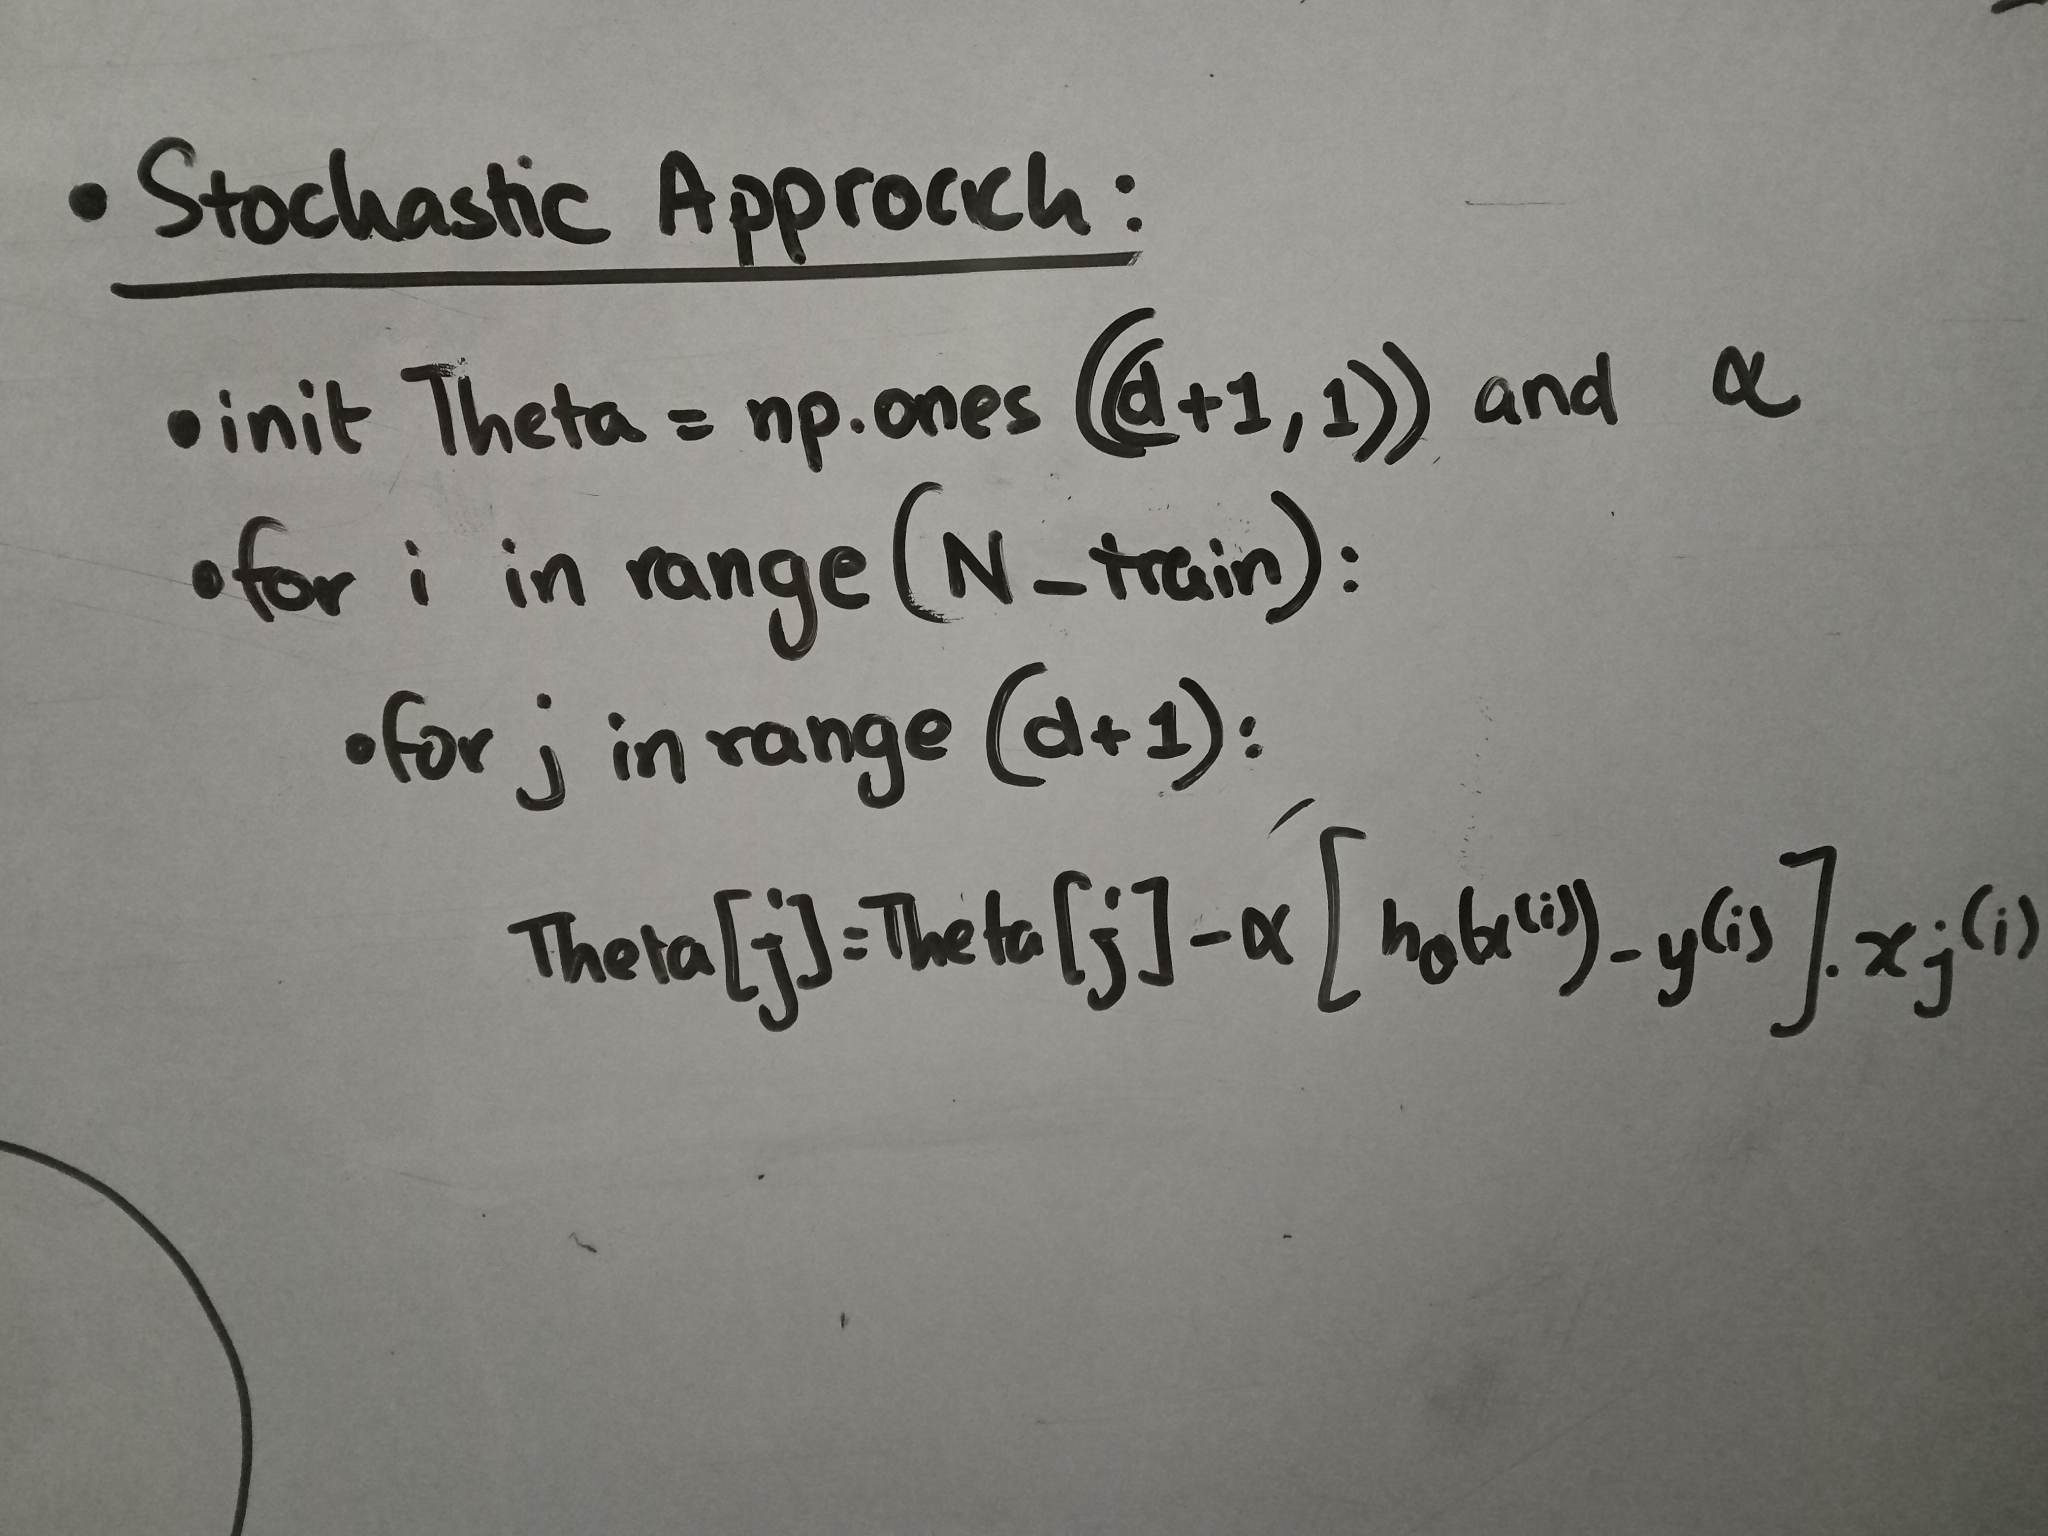

In [119]:
# Step3: use stochastic gradient descent to train the three classifiers

def stochastic ( indata, inlabels, alpha ):
    
    # init W
    W = np.ones((d+1,1))

    for i in range (N_train):
        for j in range (d+1):
            this_datapoint = np.reshape(indata[i,:], (d+1,1))
            W[j] = W[j]- (alpha)*( h_x(W, this_datapoint) - inlabels[i] )
    return W


# Training the three classifiers
W_trained_1 = stochastic ( X_train_stacked, Y_train_1, 0.05 )
print(W_trained_1)

W_trained_2 = stochastic ( X_train_stacked, Y_train_2, 0.05 )
print(W_trained_2)

W_trained_3 = stochastic ( X_train_stacked, Y_train_2, 0.05 )
print(W_trained_3)

[[-0.24853124]
 [-0.24536891]
 [-0.24167132]
 [-0.24009604]
 [-0.23393952]
 [-0.23234402]
 [-0.2262152 ]
 [-0.22009715]]
[[-0.01013841]
 [-0.00914725]
 [-0.00760969]
 [-0.00920901]
 [-0.00594015]
 [-0.00502496]
 [ 0.00133077]
 [ 0.00671108]]
[[-0.01013841]
 [-0.00914725]
 [-0.00760969]
 [-0.00920901]
 [-0.00594015]
 [-0.00502496]
 [ 0.00133077]
 [ 0.00671108]]


### Good news: Parameter vectors for each classifier appears to be significantly different!

In [145]:
# Step4: Testing on test datased
Y_pred_test = np.zeros ((N_test,1))

labels = [1.0, 2.0, 3.0]

# For each test datapoint i
for i, testpoint in enumerate(X_test_stacked):
    scores = [0,0,0]
    # For each classifier, run the classifier on this datapoint
    scores[0] = h_x ( W_trained_1, testpoint)
    scores[1] = h_x ( W_trained_2, testpoint)
    scores[2] = h_x ( W_trained_3, testpoint)
        
    # Determine which classifier's score was the highest. 
    maxprob_index = scores.index(max(scores))
    
    # Set y_pred[i] as that classifier's associate positive label 
    Y_pred_test[i] = labels[maxprob_index]
    
Y_pred_test

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [146]:
# Step4: Testing on train datased
Y_pred_train = np.zeros ((N_train,1))

labels = [1.0, 2.0, 3.0]

# For each test datapoint i
for i, testpoint in enumerate(X_test_stacked):
    scores = [0,0,0]
    # For each classifier, run the classifier on this datapoint
    scores[0] = h_x ( W_trained_1, testpoint)
    scores[1] = h_x ( W_trained_2, testpoint)
    scores[2] = h_x ( W_trained_3, testpoint)
        
    # Determine which classifier's score was the highest. 
    maxprob_index = scores.index(max(scores))
    
    # Set y_pred[i] as that classifier's associate positive label 
    Y_pred_train[i] = labels[maxprob_index]
    
Y_pred_train 

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [150]:
# Confusion Matrix

print('for test dataset:')
get_conftmat (Y_test, Y_pred_test)

print('for train dataset:')
get_conftmat (Y_train, Y_pred_train)

for test dataset:
(70, 1)
TP FP: 22.0 48.0
FN TN: 48.0 22.0
for train dataset:
(140, 1)
TP FP: 23.0 47.0
FN TN: 47.0 23.0


array([[23., 23.],
       [47., 47.]])

### Observation1: When done from scratch, the model still gives the mysterious "all 2.0" result that I got by running the library function on the test dataset. 

### Observation2: Difference between test and trainset performance is marginally different; not enough to make any meaningful comments on overfitting/underfitting.

This either means that my model has successfully achieved the same level of effectiveness as the library functions, or both my usages were just equally wrong. 

Ask professor: Which one is it?